## Comparing different methods for the classification of handwritten uppercase letters of the latin alphabet

Using a preprocessed dataset consisting of greyscale images of handwritten letters provided by...

Compare on different aspects of performance: accuracy, speed, etc.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Reading the dataset into a dataframe. The first column contains the label for each row (0 = A, 1 = B, ..., 25 = Z).

In [3]:
df = pd.read_csv("A_Z Handwritten Data.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Separating the labels from the greyscale data and partitioning off test and validation sets.

In [4]:
labels = df[0]
data = df.drop(0, axis = 1)

model_data, test_data, model_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 1)
train_data, validation_data, train_labels, validation_labels = train_test_split(model_data, model_labels, test_size = 0.2, random_state = 1)

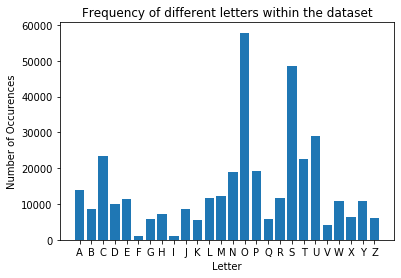

In [24]:
letter_frequency = labels.value_counts(sort = False)

ax = plt.subplot()
plt.bar(labels.unique(), letter_frequency)
plt.title("Frequency of different letters within the dataset")
plt.xlabel("Letter")
plt.ylabel("Number of Occurences")
ax.set_xticks(labels.unique())
ax.set_xticklabels(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"])
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1).fit(train_data, train_labels)

In [ ]:
guesses = knn.predict(validation_data)

In [ ]:
print(knn.score(validation_data, validation_labels))